In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_excel('merged_data.xlsx')
df.columns

Index(['Unnamed: 0', 'State', 'AreaName', 'All_Poverty', 'M_Poverty',
       'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
       'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'fips_x', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'fips_y', 'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

In [2]:
DF=df[['All_Poverty', 'M_Poverty','F_Poverty','Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','M_With', 'M_Without','F_With','F_Without','All_With','All_Without','Incidence_Rate','Mortality_Rate']]
for index, row in DF.iterrows():
    incidence_rate = row['Incidence_Rate']

    # Check if the value is a string and ends with '#'
    if isinstance(incidence_rate, str) and incidence_rate.endswith('#'):
        # Remove the '#' character and convert to float
        updated_incidence_rate = float(incidence_rate[:-1])

        # Update the DataFrame with the new value
        DF.at[index, 'Incidence_Rate'] = updated_incidence_rate
DF_copy = DF.copy()
DF_copy.replace({'_': np.nan, '__': np.nan,'*':np.nan}, inplace=True)

DF_copy.loc[DF_copy['Incidence_Rate'] == '*', 'Incidence_Rate'] =16
DF_copy.loc[DF_copy['Mortality_Rate'] == '*', 'Mortality_Rate'] =16
DF_copy = DF_copy.apply(pd.to_numeric, errors='coerce') # The 'coerce' parameter converts any non-numeric values to NaN
DF=DF_copy

column_means = DF_copy.mean()
for column in DF_copy.columns:
    DF_copy[column].fillna(column_means[column], inplace=True)

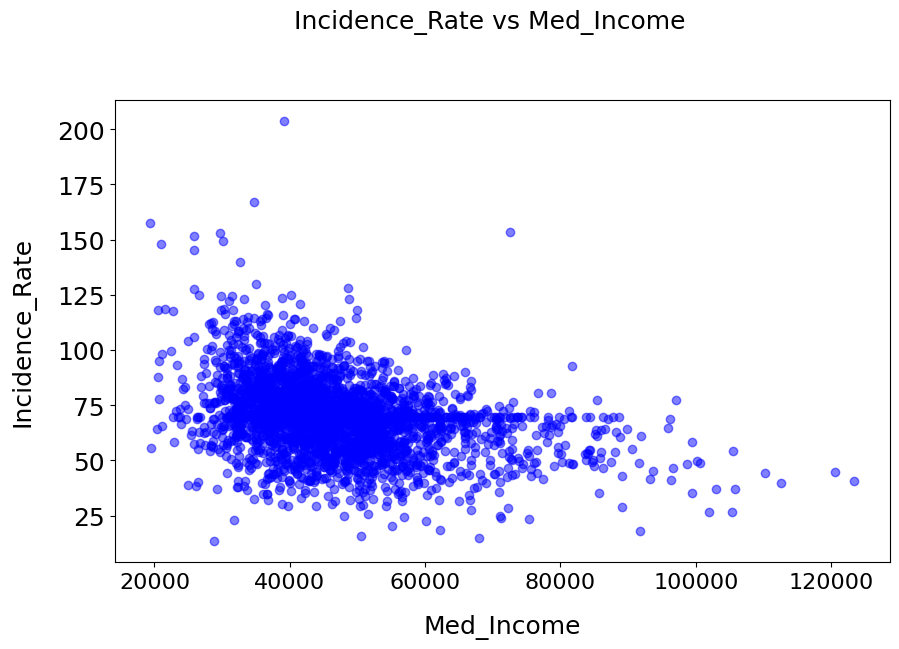

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(DF.Med_Income, DF.Incidence_Rate, c='blue', alpha=0.5)
ax.set_xlabel("Med_Income",fontsize=18,labelpad=16)
ax.set_ylabel("Incidence_Rate",fontsize=18,labelpad=16)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=18)
title_below = "Incidence_Rate vs Med_Income"
fig.text(0.5,1.0, title_below, ha='center', fontsize=18)
plt.show()

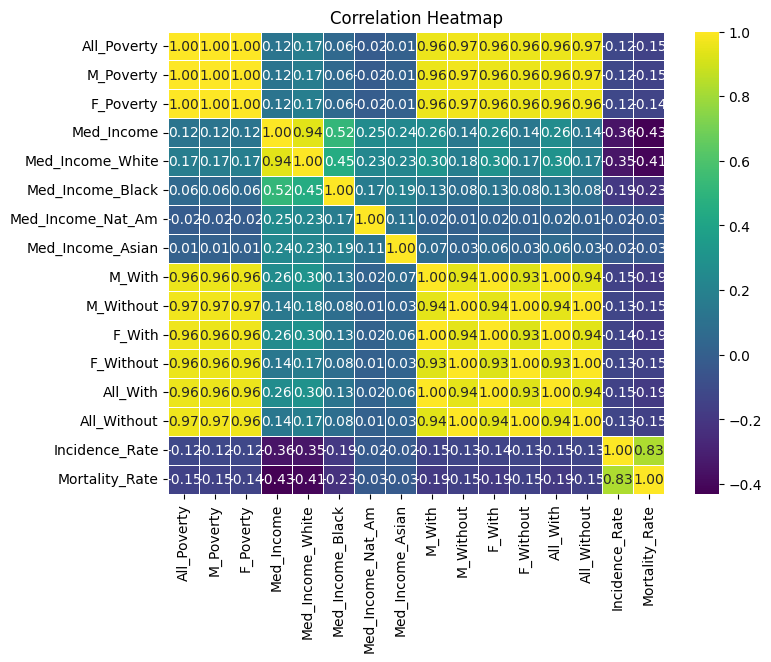

In [4]:
correlation_matrix = DF.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

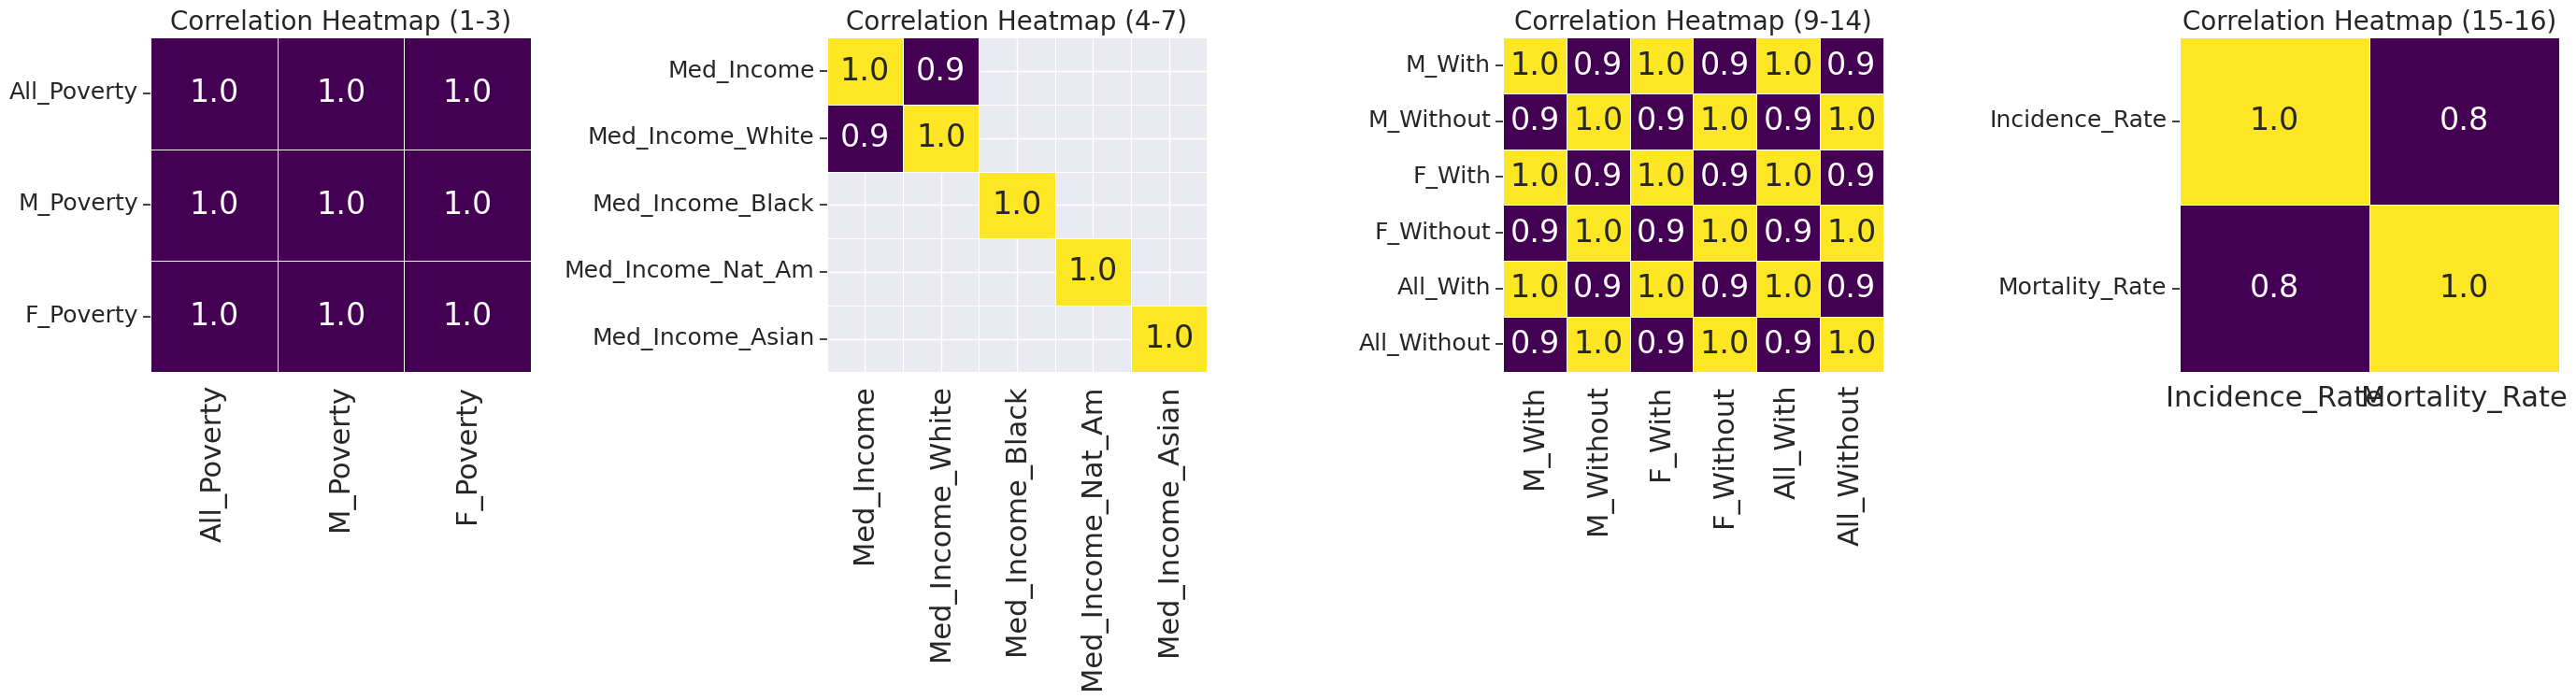

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'DF' with your data
correlation_matrix = DF.corr()

# Set the font size for the heatmap labels
sns.set(font_scale=2.0)

# Create masks to highlight highly correlated features
mask = correlation_matrix.abs() >= 0.7

# Create subplots for the correlation heatmaps
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 8))

# Plot the correlation heatmap for the first four columns
sns.heatmap(correlation_matrix.iloc[:3, :3].round(1), annot=True, cmap='viridis', fmt=".1f", linewidths=.5, mask=~mask.iloc[:3, :3], cbar=False, ax=ax1)
ax1.set_title("Correlation Heatmap (1-3)", fontsize=20)
ax1.yaxis.tick_left()  # Move y-axis ticks to the left
ax1.yaxis.set_tick_params(labelrotation=0, labelsize=18)  # Set label rotation to 0 and font size to 18

# Plot the correlation heatmap for the next four columns
sns.heatmap(correlation_matrix.iloc[3:8, 3:8].round(1), annot=True, cmap='viridis', fmt=".1f", linewidths=.5, mask=~mask.iloc[3:8, 3:8], cbar=False, ax=ax2)
ax2.set_title("Correlation Heatmap (4-7)", fontsize=20)
ax2.yaxis.tick_left()
ax2.yaxis.set_tick_params(labelrotation=0, labelsize=18)

# Plot the correlation heatmap for the next four columns
sns.heatmap(correlation_matrix.iloc[8:14, 8:14].round(1), annot=True, cmap='viridis', fmt=".1f", linewidths=.5, mask=~mask.iloc[8:14, 8:14], cbar=False, ax=ax3)
ax3.set_title("Correlation Heatmap (9-14)", fontsize=20)
ax3.yaxis.tick_left()
ax3.yaxis.set_tick_params(labelrotation=0, labelsize=18)

# Plot the correlation heatmap for the remaining columns
sns.heatmap(correlation_matrix.iloc[14:16, 14:16].round(1), annot=True, cmap='viridis', fmt=".1f", linewidths=.5, mask=~mask.iloc[14:16, 14:16], cbar=False, ax=ax4)
ax4.set_title("Correlation Heatmap (15-16)", fontsize=20)
ax4.yaxis.tick_left()
ax4.yaxis.set_tick_params(labelrotation=0, labelsize=18)

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
X=DF[['All_Poverty','Med_Income','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','All_With','All_Without']]
Y_IR=DF[['Incidence_Rate']]
Y_MR=DF[['Mortality_Rate']]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your feature matrix 'X' and target variables 'Y_IR' and 'Y_MR' prepared

# Split the data into training and testing sets
X_train, X_test, Y_IR_train, Y_IR_test, Y_MR_train, Y_MR_test = train_test_split(
    X, Y_IR, Y_MR, test_size=0.3, random_state=42)

# Create separate linear regression models for Incidence Rate and Mortality Rate
model_IR = LinearRegression()
model_MR = LinearRegression()

# Fit the models to the training data
model_IR.fit(X_train, Y_IR_train)
model_MR.fit(X_train, Y_MR_train)

# Make predictions on the test data
Y_IR_pred = model_IR.predict(X_test)
Y_MR_pred = model_MR.predict(X_test)

# Evaluate the models
IR_mse = mean_squared_error(Y_IR_test, Y_IR_pred,squared=False)
MR_mse = mean_squared_error(Y_MR_test, Y_MR_pred,squared=False)


# Print evaluation results
print("Incidence Rate Model:")
print(f"Mean Squared Error (MSE): {IR_mse}")

print("\nMortality Rate Model:")
print(f"Mean Squared Error (MSE): {MR_mse}")

Incidence Rate Model:
Mean Squared Error (MSE): 15.033737174561747

Mortality Rate Model:
Mean Squared Error (MSE): 11.762283858810637


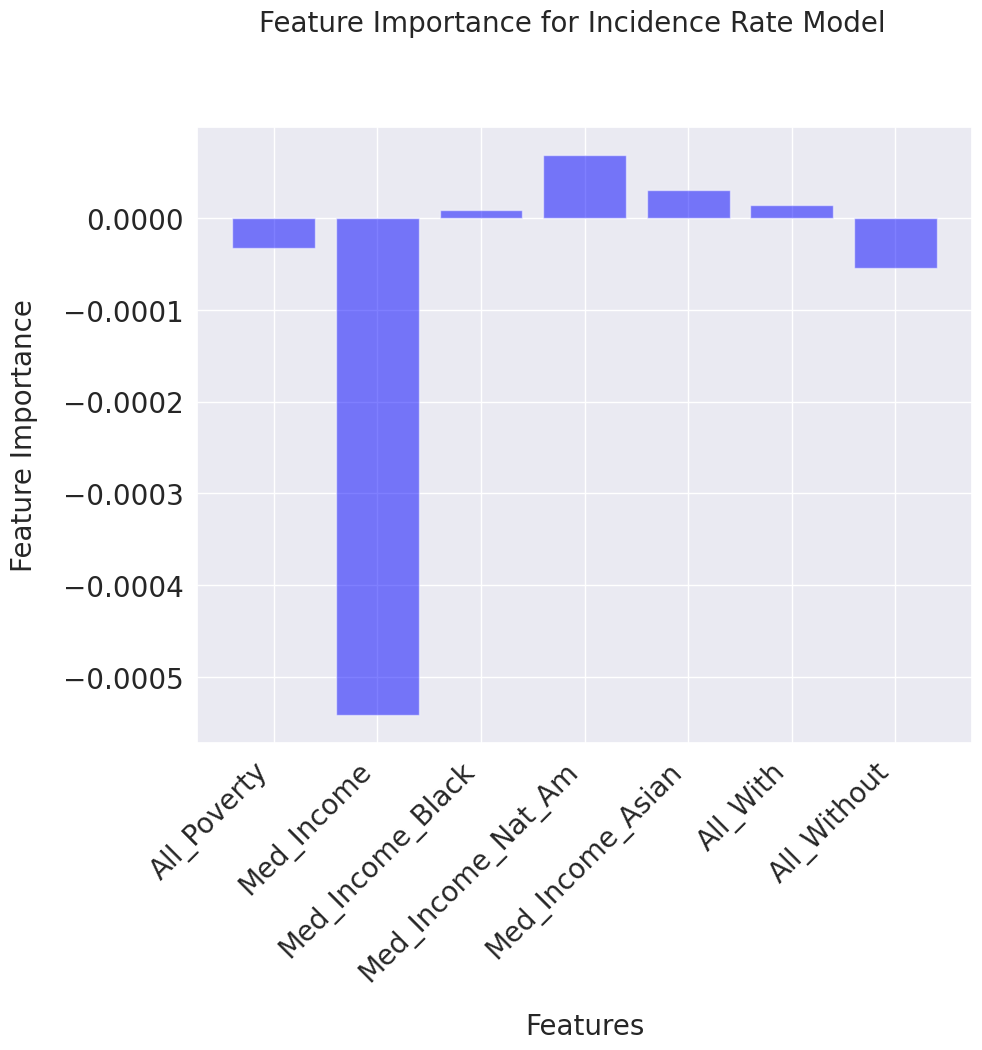

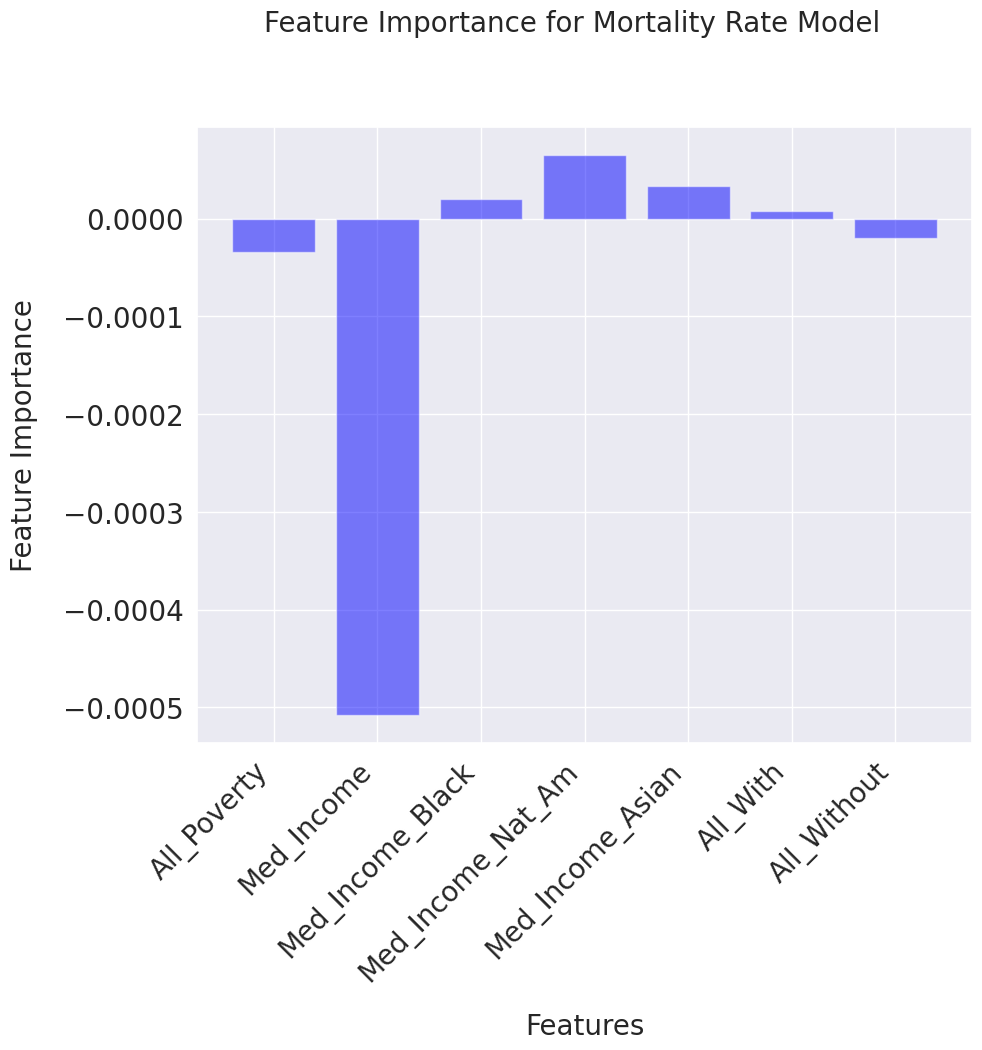

In [45]:
IR_coefficients = model_IR.coef_[0]
MR_coefficients = model_MR.coef_[0]

# Create a list of feature names
feature_names = X.columns

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature_names, IR_coefficients, color='blue', alpha=0.5)
ax.set_xlabel("Features",fontsize=20,labelpad=18)
ax.set_ylabel("Feature Importance",fontsize=20,labelpad=18)
plt.xticks(fontsize=20,rotation=45,ha='right')
plt.yticks(fontsize=20)
title_below = "Feature Importance for Incidence Rate Model"
fig.text(0.5,1.0, title_below, ha='center', fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature_names, MR_coefficients, color='blue', alpha=0.5)
ax.set_xlabel("Features",fontsize=20,labelpad=18)
ax.set_ylabel("Feature Importance",fontsize=20,labelpad=18)
plt.xticks(fontsize=20,rotation=45,ha='right')
plt.yticks(fontsize=20)
title_below = "Feature Importance for Mortality Rate Model"
fig.text(0.5,1.0, title_below, ha='center', fontsize=20)
plt.show()